# make all word list & random select

In [36]:
import random, json
with open('js/words.js') as f:
    next(f)
    dic = json.load(f)

In [37]:
all_item = []
for genre, words in dic.items():
    for word in words:
        all_item.append([genre, word])
print(len(all_item))

allword = [x[1] for x in all_item]
allword_set = set(allword)
for w in allword:
    if allword.count(w) > 1:
            print(w)

560


# rewrite

In [33]:
for v in dic.values():
    v.sort()

In [34]:
with open('words.js', 'w') as f:
    f.write("const word_dic = \n")
    json.dump(dic, f, indent=4, ensure_ascii=False)

In [4]:
import numpy as np
x = np.linspace(-2,2,5000)
y = np.sqrt((4-x**2)/2)

In [13]:
M, m = 0, 0
z = []
for i, j in zip(x,y):
    z1 = i**3 + j**3
    z2 = i**3 + (-j)**3
    z.append(z1)
    if z1 > M:
        M = z1; L = (i,j)
    if z2 > M:
        M = z2; L = (i,j)
    if z1 < m:
        m = z1; l = (i,j)
    if z2 < m:
        m = z2; l = (i,j)

In [10]:
print(M, m)
print(L, l)

8.0 -8.0
(2.0, 0.0) (-2.0, 0.0)


In [11]:
import matplotlib.pyplot as plt

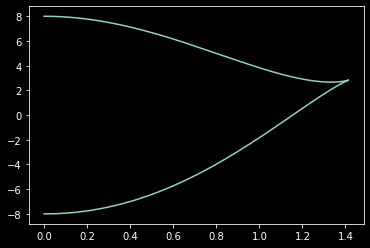

In [19]:
plt.plot(y,z)
plt.show()

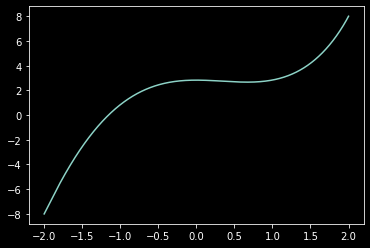

In [20]:
plt.plot(x,z)
plt.show()

In [2]:
t = """I Saw Her Standing There
Misery
Anna (Go To Him)
Chains
Boys
Ask Me Why
Please Please Me
Love Me Do
P.S. I Love You
Baby It's You
Do You Want To Know A Secret?
A Taste Of Honey
There's A Place
Twist And Shout
It Won't Be Long
All I've Got To Do
All My Loving
Don't Bother Me
Little Child
Till There Was You
Please Mister Postman
Roll Over Beethoven
Hold Me Tight
You Really Got A Hold On Me
I Wanna Be Your Man
Devil In Her Heart
Not A Second Time
Money (That's What I Want)
A Hard Day's Night
I Should Have Known Better
If I Fell
I'm Happy Just To Dance With You
And I Love Her
Tell Me Why
Can't Buy Me Love
Any Time At All
I'll Cry Instead
Things We Said Today
When I Get Home
You Can't Do That
I'll Be Back
No Reply
I'm A Loser
Baby's In Black
Rock And Roll Music
I'll Follow The Sun
Mr. Moonlight
Kansas City/Hey, Hey, Hey, Hey
Eight Days A Week
Words of Love
Honey Don't
Every Little Thing
I Don't Want To Spoil The Party
What You're Doing
Everybody's Trying To Be My Baby
Help!
The Night Before
You've Got To Hide Your Love Away
I Need You
Another Girl
You're Going to Lose That Girl
Ticket To Ride
Act Naturally
It's Only Love
You Like Me Too Much
Tell Me What You See
I've Just Seen a Face
Yesterday
Dizzy Miss Lizzy
Drive My Car
Norwegian Wood (This Bird Has Flown)
You Won't See Me
Nowhere Man
Think For Yourself
The Word
Michelle
What Goes On
Girl
I'm Looking Through You
In My Life
Wait
If I Needed Someone
Run For Your Life
Taxman
Eleanor Rigby
I'm Only Sleeping
Love You To
Here, There And Everywhere
Yellow Submarine
She Said She Said
Good Day Sunshine
And Your Bird Can Sing
For No One
Doctor Robert
I Want To Tell You
Got To Get You Into My Life
Tomorrow Never Knows
Sgt. Pepper's Lonely Hearts Club Band
With A Little Help From My Friends
Lucy In The Sky With Diamonds
Getting Better
Fixing A Hole
She's Leaving Home
Being For The Benefit Of Mr Kite!
Within You Without You
When I'm Sixty-Four
Lovely Rita
Good Morning Good Morning
Sgt. Pepper's Lonely Hearts Club Band (Reprise)
A Day In The Life
Magical Mystery Tour
The Fool On The Hill
Flying
Blue Jay Way
Your Mother Should Know
I Am The Walrus
Hello, Goodbye
Strawberry Fields Forever
Penny Lane
Baby You're A Rich Man
All You Need Is Love
Back In The U.S.S.R
Dear Prudence
Glass Onion
Ob-La-Di, Ob-La-Da
Wild Honey Pie
The Continuing Story Of Bungalow Bill
While My Guitar Gently Weeps
Happiness Is A Warm Gun
Martha My Dear
I'm So Tired
Blackbird
Piggies
Rocky Raccoon
Don't Pass Me By
Why Don't We Do It In The Road
I Will
Julia
Birthday
Yer Blues
Mother Nature's Son
Everybody's Got Something To Hide Except Me And My Monkey
Sexy Sadie
Helter Skelter
Long, Long, Long
Revolution 1
Honey Pie
Savoy Truffle
Cry Baby Cry
Revolution 9
Good Night
Yellow Submarine
Only A Northern Song
All Together Now
Hey Bulldog
It's All Too Much
All You Need Is Love
Come Together
Something
Maxwell's Silver Hammer
Oh! Darling
Octopus's Garden
I Want You (She's So Heavy)
Here Comes The Sun
Because
You Never Give Me Your Money
Sun King
Mean Mr. Mustard
Polythene Pam
She Came In Through The Bathroom Window
Golden Slumbers
Carry That Weight
The End
Her Majesty
Two Of Us
Dig a Pony
Across The Universe
I Me Mine
Dig it
Let It Be
Maggie Mae
I've Got A Feeling
One After 909
The Long And Winding Road
For You Blue
Get Back
Love Me Do
From Me To You
Thank You Girl
She Loves You
I'll Get You
I Want To Hold Your Hand
This Boy
Komm, Gib Mir Deine Hand
Sie Liebt Dich
Long Tall Sally
I Call Your Name
Slow Down
Matchbox
I Feel Fine
She's A Woman
Bad Boy
Yes It Is
I'm Down
Day Tripper
We Can Work It Out
Paperback Writer
Rain
Lady Madonna
The Inner Light
Hey Jude
Revolution
Get Back
Don't Let Me Down
The Ballad Of John and Yoko
Old Brown Shoe
Across The Universe
Let It Be
You Know My Name (Look Up The Number)
"""

In [7]:
#t = t.split('\n')
for x in t:
    print(x+',')

I Saw Her Standing There,
Misery,
Anna (Go To Him),
Chains,
Boys,
Ask Me Why,
Please Please Me,
Love Me Do,
P.S. I Love You,
Baby It's You,
Do You Want To Know A Secret?,
A Taste Of Honey,
There's A Place,
Twist And Shout,
It Won't Be Long,
All I've Got To Do,
All My Loving,
Don't Bother Me,
Little Child,
Till There Was You,
Please Mister Postman,
Roll Over Beethoven,
Hold Me Tight,
You Really Got A Hold On Me,
I Wanna Be Your Man,
Devil In Her Heart,
Not A Second Time,
Money (That's What I Want),
A Hard Day's Night,
I Should Have Known Better,
If I Fell,
I'm Happy Just To Dance With You,
And I Love Her,
Tell Me Why,
Can't Buy Me Love,
Any Time At All,
I'll Cry Instead,
Things We Said Today,
When I Get Home,
You Can't Do That,
I'll Be Back,
No Reply,
I'm A Loser,
Baby's In Black,
Rock And Roll Music,
I'll Follow The Sun,
Mr. Moonlight,
Kansas City/Hey, Hey, Hey, Hey,
Eight Days A Week,
Words of Love,
Honey Don't,
Every Little Thing,
I Don't Want To Spoil The Party,
What You're Doing,
E

In [1]:
text = """
There are places I'll remember
All my life though some have changed
Some forever not for better
Some have gone and some remain

All these places had their moments
With lovers and friends I still can recall
Some are dead and some are living
In my life I've loved them all

But of all these friends and lovers
There is no one compares with you
And these memories lose their meaning
When I think of love as something new

Though I know I'll never lose affection
For people and things that went before
I know I'll often stop and think about them
In my life I love you more

Though I know I'll never lose affection
For people and things that went before
I know I'll often stop and think about them
In my life I love you more

In my life I love you more
"""

text.replace('\n','<br>')

"<br>There are places I'll remember<br>All my life though some have changed<br>Some forever not for better<br>Some have gone and some remain<br><br>All these places had their moments<br>With lovers and friends I still can recall<br>Some are dead and some are living<br>In my life I've loved them all<br><br>But of all these friends and lovers<br>There is no one compares with you<br>And these memories lose their meaning<br>When I think of love as something new<br><br>Though I know I'll never lose affection<br>For people and things that went before<br>I know I'll often stop and think about them<br>In my life I love you more<br><br>Though I know I'll never lose affection<br>For people and things that went before<br>I know I'll often stop and think about them<br>In my life I love you more<br><br>In my life I love you more<br>"

In [1]:
### LIST OF SCORE PDFs
import os, glob, re
files = glob.glob('music/scores/*')
files = sorted([f.split('/')[-1].split('.pdf')[0] for f in files])

In [2]:
files

['A Day In The Life',
 "A Hard Day's Night",
 'Across The Universe',
 'All My Loving',
 "Baby's In Black",
 'Back In The U.S.S.R.',
 'Bitrhday',
 "Can't Buy Me Love",
 'Come Together',
 'Day Tripper',
 'Dear Prudence',
 'Devil In Her Heart',
 'Dig A Pony',
 'Dizzy Miss Lizzy',
 'Doctor Robert',
 "Don't Let Me Down",
 'Drive My Car',
 "Everybody's Trying To Be My Baby",
 'Get Back',
 'Help!',
 'Helter Skelter',
 'Here Comes The Sun',
 'Hey Bulldog',
 'Hold Me Tight',
 'I Call Your Name',
 "I Don't Want To Spoil The Party",
 'I Feel Fine',
 'I Need You',
 'I Saw Her Standing There',
 'I Should Have Known Better',
 'I Wanna Be Your Man',
 'I Want To Hold Your Hand',
 'I Want You',
 "I'll Be Back",
 "I'll Follow The Sun",
 "I'm Down",
 "I'm Happy Just To Dance With You",
 "I've Got A Feeling",
 'If I Fell',
 'In My Life',
 "It Won't Be Long",
 'Lady Madonna',
 'Let It Be',
 'Long Tall Sally',
 'Love Me Do',
 'Magical Mystery Tour',
 'Michelle',
 "Money (That's What I Want)",
 'No Reply',
 